In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("./datasets/world_data_full_apply_nulos.csv", index_col = 0)

df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


# 1. Relación entre fertilidad y esperanza de vida

- Variables:

    - fertility_rate

    - life_expectancy

1. Calcula el coeficiente de correlación de Pearson entre fertility_rate y life_expectancy.

In [9]:
resultado = df['fertility_rate'].corr(df['life_expectancy'])
resultado

-0.8491528107360005

2. Crea un diagrama de dispersión (scatter plot) con:

    Eje X: fertility_rate

    Eje Y: life_expectancy

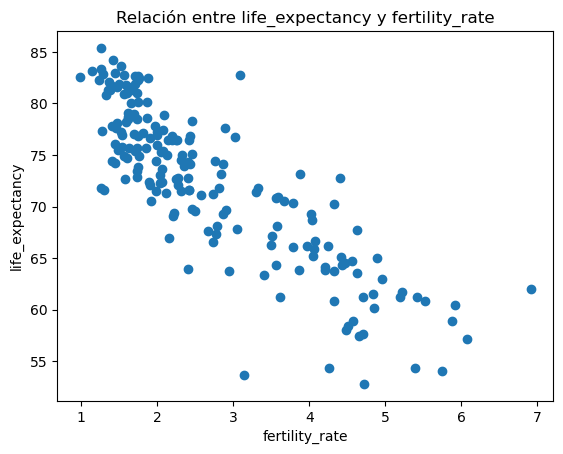

In [10]:
plt.scatter(df["fertility_rate"], df["life_expectancy"])
plt.xlabel("fertility_rate")
plt.ylabel("life_expectancy")
plt.title("Relación entre life_expectancy y fertility_rate")
plt.show()

3. Interpreta:

    ¿La correlación es positiva o negativa? ¿Es fuerte, moderada o débil?

    Describe, en lenguaje de negocio, qué significa esta relación:

        - “En general, los países con X tienden a tener Y…”.

# 2. PIB, emisiones y población: ¿qué se relaciona con qué?

- Variables:

    - gdp

    - co2-emissions

    - population

1. Calcula una matriz de correlación solo con estas tres variables.

In [16]:
columnas_interes = ['gdp', 'co2-emissions', 'population']
matriz = df[columnas_interes].corr()

print(matriz)

                    gdp  co2-emissions  population
gdp            1.000000       0.479662    0.274346
co2-emissions  0.479662       1.000000   -0.168062
population     0.274346      -0.168062    1.000000


2. (Opcional) Representa la matriz en un heatmap.

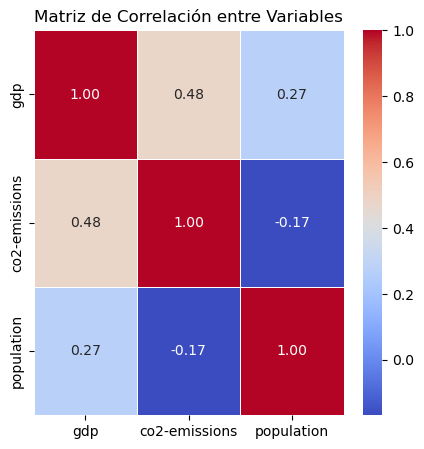

In [18]:
# Visualiza la matriz de correlación utilizando seaborn
plt.figure(figsize=(5, 5))

sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Añade título
plt.title('Matriz de Correlación entre Variables')

# Muestra el gráfico

plt.show()

3. Interpreta:

    - ¿Qué par de variables tiene la correlación más alta?

    - ¿Tiene sentido desde el punto de vista económico/medioambiental?

    - ¿Hay algún par con correlación muy baja (cerca de 0)? ¿Qué interpretación darías?

# 3. Distribución de países por continente (variable categórica)

Variable categórica: continent

1. Calcula la tabla de frecuencias de continent:

    - Frecuencia absoluta (número de países por continente).

    - Frecuencia relativa o porcentaje sobre el total.

In [19]:
# queremos analizar la distribución del estado civil de los clientes en nuestro conjunto de datos.
# calculamos la tabla de frecuencia absoluta
frecuencia_absoluta = df['continent'].value_counts()

# calculamos la tabla de frecuencia relativa incluyendo el parámetro "normalize" para que nos lo convierta en tanto por 1. 
frecuencia_relativa = df['continent'].value_counts(normalize=True) * 100

# creamos un DataFrame para mostrar ambas tablas
tabla_frecuencias = pd.DataFrame({
    'Continent': frecuencia_absoluta.index,
    'Frecuencia Absoluta': frecuencia_absoluta.values,
    'Frecuencia Relativa (%)': frecuencia_relativa.values
})
# vemos la tabla de frecuencias
tabla_frecuencias

,Continent,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Africa,53,27.319588
1,Europe,47,24.226804
2,Asia,45,23.195876
3,Central America,20,10.309278
4,Oceania,14,7.216495
5,South America,13,6.701031
6,North America,2,1.030928


2. Interpreta:

    - ¿Qué continente tiene más países en el dataset?

    - ¿Qué continentes están menos representados?

    - Desde el punto de vista de un analista, ¿por qué es importante conocer esta distribución antes de comparar indicadores entre continentes?

# 4. Idioma oficial: ¿qué idiomas son más frecuentes?

Variable categórica: official_language

1. Calcula la frecuencia absoluta y relativa de official_language.

In [ ]:
# queremos analizar la distribución del estado civil de los clientes en nuestro conjunto de datos.
# calculamos la tabla de frecuencia absoluta
frecuencia_absoluta = df['official_language'].value_counts()

# calculamos la tabla de frecuencia relativa incluyendo el parámetro "normalize" para que nos lo convierta en tanto por 1. 
frecuencia_relativa = df['official_language'].value_counts(normalize=True) * 100

# creamos un DataFrame para mostrar ambas tablas
tabla_frecuencias = pd.DataFrame({
    'official_language': frecuencia_absoluta.index,
    'Frecuencia Absoluta': frecuencia_absoluta.values,
    'Frecuencia Relativa (%)': frecuencia_relativa.values
})
# vemos la tabla de frecuencias
tabla_frecuencias

,official_language,Frecuencia Absoluta,Frecuencia Relativa (%)
0,English,31,16.315789
1,French,25,13.157895
2,Spanish,19,10.000000
3,Arabic,18,9.473684
4,Portuguese,7,3.684211
...,...,...,...
71,Albanian,1,0.526316
72,Jamaican English,1,0.526316
73,Lao,1,0.526316
74,Latvian,1,0.526316


2. Identifica:

    - Los 5 idiomas oficiales más frecuentes.

In [22]:
tabla_frecuencias.head(5)

,official_language,Frecuencia Absoluta,Frecuencia Relativa (%)
0,English,31,16.315789
1,French,25,13.157895
2,Spanish,19,10.000000
3,Arabic,18,9.473684
4,Portuguese,7,3.684211


3. Interpreta:

    - ¿Hay algún idioma claramente dominante?

    - ¿Qué implicaciones podría tener esto a la hora de diseñar encuestas, campañas o informes internacionales?

(Si hay demasiadas categorías, puedes usar algo como value_counts().head(10) para ver solo las más frecuentes.)